In [1]:
%load_ext autoreload
%autoreload 2

## import general packages
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib nbagg

import os, sys

## add root directory to path, to allow for imports 
root_dir = os.path.dirname(os.path.abspath(os.getcwd()))
if not root_dir in sys.path: sys.path.append(root_dir)


## import darkMatter specific packages
from darkMatter import darkMatter, readNetCDF
from utils.plots import *
from utils.parameters import create_population_values, set_options

from empirical.model import *

In [2]:
## setting simulation parameters
steps=100
plot_ax3D=True
save=0
file_format='png'
rerun=True
compile=False

In [3]:
## definining plotting functions
def plot_phase_loc(x,y,handles=None,axes=None):
    
    if handles:
        h_lnu,h_l1,h_l2 = handles
        
        h_lnu.set_xdata(x)
        h_lnu.set_ydata(y)

        h_l1.set_xdata(x)
        h_l1.set_ydata(y)
        
        h_l2.set_xdata(x)
        h_l2.set_ydata(y)
        
    elif axes:
        ax_phase_nu, ax_phase1, ax_phase2 = axes 
        h_lnu, = ax_phase_nu.plot(x,y,'o',color='green',markersize=10,markerfacecolor='none')
        h_l1, = ax_phase1.plot(x,y,'o',color='green',markersize=10,markerfacecolor='none')
        h_l2, = ax_phase2.plot(x,y,'o',color='green',markersize=10,markerfacecolor='none')
    
    return [h_lnu,h_l1,h_l2]


def plot_thresholds(alpha_arr,psi_1,psi_2,alpha_1,alpha_2,handles=None,ax=None):

    p_threshold_1 = np.exp(-(alpha_arr - psi_1)**2./(2*alpha_1**2))
    p_threshold_2 = np.exp(-(alpha_arr - psi_2)**2./(2*alpha_2**2))
    
    if handles:
        h_a1,h_a2,h_a12 = handles
        
        h_a1.set_ydata(p_threshold_1)
        h_a2.set_ydata(p_threshold_2)
        h_a12.set_ydata(p_threshold_1+p_threshold_2)
    else:
        h_a1, = ax.plot(alpha_arr,p_threshold_1,'k--',label='$\\rho(\\Psi_1)$')
        h_a2, = ax.plot(alpha_arr,p_threshold_2,'k-',label='$\\rho(\\Psi_2)$')
        h_a12, = ax.plot(alpha_arr,p_threshold_1+p_threshold_2,'r-',label='$\\rho(\\Psi_{1+2})$')
        ax.legend()

    return [h_a1,h_a2,h_a12]


def plot_distributions(nu_arr,gamma_1,gamma_2,delta_1,delta_2,nu_max_1,nu_max_2,handles=None,ax=None):
    print("distr",gamma_1,gamma_2)
    p_nu_1 = p_nu(nu_arr,gamma_1,delta_1,nu_max_1)
    p_nu_2 = p_nu(nu_arr,gamma_2,delta_2,nu_max_2)
    
    if handles:
        h_p1,h_p2,h_p12 = handles
        h_p1.set_ydata(p_nu_1)
        h_p2.set_ydata(p_nu_2)
        h_p12.set_ydata(p_nu_1+p_nu_2)
        
    else:
        h_p1, = ax.plot(nu_arr,p_nu_1,'k--',label='$\\rho(\\nu_1)$')
        h_p2, = ax.plot(nu_arr,p_nu_2,'k-',label='$\\rho(\\nu_2)$')
        h_p12, = ax.plot(nu_arr,p_nu_1+p_nu_2,'r-',label='$\\rho(\\nu_{1+2})$')
        ax.legend()
        
    max_val = np.nanmax((p_nu_1+p_nu_2)[2:])
    print('max:',max_val)
    plt.setp(ax,xlim=[0,1],ylim=[0,np.nanmax([1.,max_val*1.1])])
    
    return [h_p1,h_p2,h_p12]

In [4]:
nI = 2
nE = 0
options = set_options(nI=nI,nE=nE)
options['simulation'] = {
    #'Psi_0': [-0.15,0.15],
    'alpha_0': [0,0.1],
    'rateWnt': [0,4],
    'sim_prim': [0,2,0],
    'sim_sec': [0,-1,0]
}
options['eps'] = np.sqrt(0.5)
options['eta'] = 0.5
#options['tau_n'] = [1.,0.3,0.3]
options['tau_n'] = [1.]
#options['tau_I'] = 0.005
options['mode_selfcon'] = 1
res = darkMatter(steps=steps,options=options,cleanup=False,rerun=True,compile=True)

order = list(options['simulation'].keys())

g++ -g -Wall -ansi -o /home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/theory/sharkfins /home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/theory/sharkfins.cpp  -lgsl -lgslcblas -lnetcdf -std=c++17
def done 


In [5]:
params = readNetCDF(res['filePaths'][0])
#params

<IPython.core.display.Javascript object>


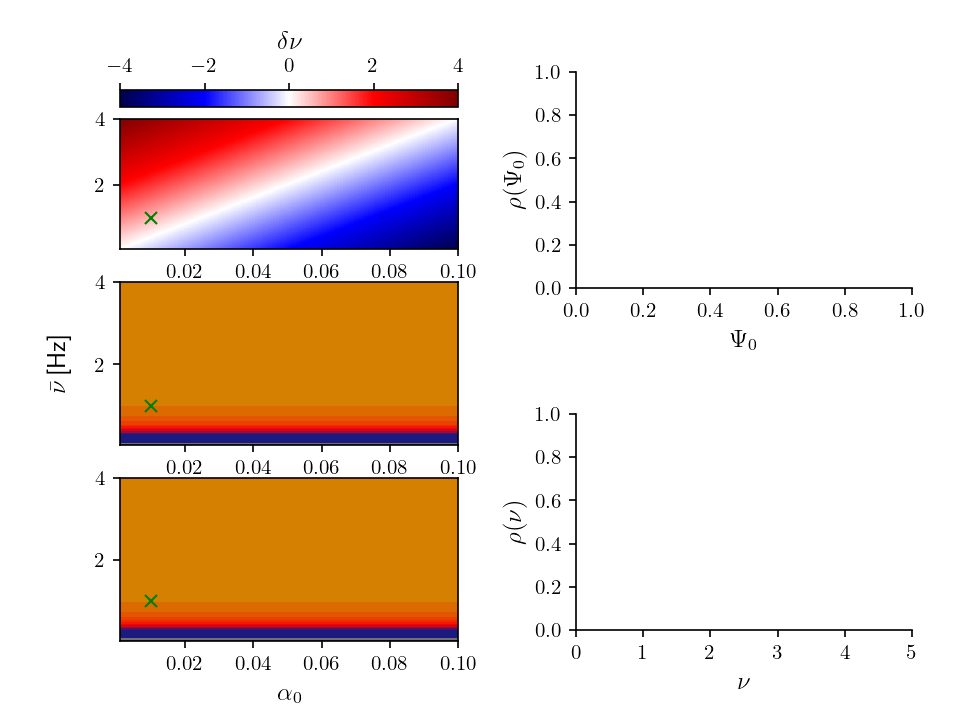

['alpha_0', 'rateWnt', 'sim_prim', 'sim_sec']


interactive(children=(IntSlider(value=20, description='$\\displaystyle \\alpha_0$'), IntSlider(value=20, descr…

In [6]:
%matplotlib nbagg
set_plot_params()

fig = plt.figure()

#fig,ax = plt.subplots(2,2,figsize=(7.5,5),dpi=100)
plt_para = {
    'ax_label': [],
    'const_label': []
}

## prepare axes of subplots
big_ax = fig.add_subplot(121)

ax_phase_nu = fig.add_subplot(321)
ax_phase1 = fig.add_subplot(323)
ax_phase2 = fig.add_subplot(325)

ax_threshold = fig.add_axes([0.6,0.6,0.35,0.3])
ax_firingrate = fig.add_axes([0.6,0.125,0.35,0.3])

plt.setp(ax_threshold,xlabel='$\\Psi_0$',ylabel='$\\rho(\\Psi_0)$')
plt.setp(ax_firingrate,xlabel='$\\nu$',ylabel='$\\rho(\\nu)$',xlim=[0,5*options['rateWnt']])
ax_threshold.spines[['top','right']].set_visible(False)
ax_firingrate.spines[['top','right']].set_visible(False)

#x=70; y=40
x=20; y=20

nu_1 = get_nu_bar(res['gamma'][0,...],res['delta'][0,...],res['rate_max'][0,...])
#for i in range(0,steps):
#    col = [1-(i+1)/steps]*3
#    ax_phase_nu.plot(res['Psi_0'],nu_1[i,:],'-',color=col)
    
#ax[1][0].plot(res['alpha_0'],nu_2,'k-')
para = {
    'rateWnt': params['rateWnt'],
    'alpha_0': params['alpha_0'],
    'Psi_0': params['Psi_0']
}

print(order)
if 'rateWnt' in order[:2]:
    para['rateWnt'] = np.tile(res['rateWnt'],(2,1))
#rates = options['rateWnt']

h_im1 = ax_phase_nu.imshow(nu_1-para['rateWnt'][0],origin='lower',vmin=-np.max(para['rateWnt']),vmax=np.max(para['rateWnt']),cmap='seismic',extent=[res[order[0]][0],res[order[0]][-1],res[order[1]][0],res[order[1]][-1]],aspect='auto')
ax_cb = fig.colorbar(h_im1, ax=ax_phase_nu, location='top', anchor=(0, 0.5), shrink=1.0)
#plt.setp(ax_cb.ax.get_xaxis(),label='$\\delta\\nu$')
ax_cb.set_label('$\\delta\\nu$')

for p,axx in enumerate([ax_phase1,ax_phase2]):
    plot_fins(axx,res[order[0]],res[order[1]],res['gamma'][-2+p,...],res['chi'][-2+p,...],res['regions'][-2+p,...],plt_para)

for axx in [ax_phase_nu,ax_phase1,ax_phase2]:
    axx.plot(options[order[0]],options[order[1]],'x',color='green',markersize=6)


alpha_arr = np.linspace(-0.2,0.1,101)
nu_arr = np.linspace(1/10000,20,10000)

plt.setp(big_ax,xlabel=get_displayString(order[0]),ylabel=get_displayString(order[1]))
big_ax.set_facecolor('none')
big_ax.tick_params(labelcolor='none',top=False,bottom=False,left=False,right=False)
big_ax.spines[['top','right','bottom','left']].set_visible(False)

x_widget = widgets.IntSlider(x,min=0,max=steps,orientation='horizontal',description=get_displayString(order[0]))
y_widget = widgets.IntSlider(y,min=0,max=steps,orientation='horizontal',description=get_displayString(order[1]))

global h_loc, h_thresholds, h_distributions
h_loc = None
h_thresholds = None
h_distributions = None

def update_plot(x,y):
    
    if options['simulation']['sim_prim'][1]==-1:
        params[order[0]][:] = res[order[0]][x]
    else:
        params[order[0]][options['simulation']['sim_prim'][1]] = res[order[0]][x]
    
    if options['simulation']['sim_sec'][1]==-1:
        params[order[1]][:] = res[order[1]][y]
    else:
        params[order[1]][options['simulation']['sim_sec'][1]] = res[order[1]][y]    
    
    global h_loc, h_thresholds, h_distributions
    
    h_loc = plot_phase_loc(res[order[0]][x],res[order[1]][y],h_loc,[ax_phase_nu,ax_phase1,ax_phase2])
    
    h_thresholds = plot_thresholds(alpha_arr,params['Psi_0'][-2],params['Psi_0'][-1],params['alpha_0'][-2],params['alpha_0'][-1],h_thresholds,ax_threshold)

    gamma_1 = res['gamma'][-2,y,x]
    gamma_2 = res['gamma'][-1,y,x]
    delta_1 = res['delta'][-2,y,x]
    delta_2 = res['delta'][-1,y,x]
    nu_max_1 = res['rate_max'][-2,y,x]
    nu_max_2 = res['rate_max'][-1,y,x]

    h_distributions = plot_distributions(nu_arr,gamma_1,gamma_2,delta_1,delta_2,nu_max_1,nu_max_2,h_distributions,ax_firingrate)
    fig.canvas.draw_idle()
#if save:
#    sv_name = './figures/two_pop_n.%s' % (file_format)
#    plt.savefig(sv_name,format=file_format,dpi=600)
#    print('Figure saved as "%s"' % sv_name)

widgets.interactive(update_plot,x=x_widget,y=y_widget)

In [62]:
res['gamma']

masked_array(
  data=[[[0.67748664, 0.67748664, 0.67748664, ..., 0.67748664,
          0.67748664, 0.67748664],
         [0.94828416, 0.94828416, 0.94828416, ..., 0.94828416,
          0.94828416, 0.94828416],
         [1.15382552, 1.15382552, 1.15382552, ..., 1.15382552,
          1.15382552, 1.15382552],
         ...,
         [1.91514177, 1.91514177, 1.91514177, ..., 1.91514177,
          1.91514177, 1.91514177],
         [1.90817564, 1.90817564, 1.90817564, ..., 1.90817564,
          1.90817564, 1.90817564],
         [1.90130996, 1.90130996, 1.90130996, ..., 1.90130996,
          1.90130996, 1.90130996]],

        [[0.67748664, 0.67748664, 0.67748664, ..., 0.67748664,
          0.67748664, 0.67748664],
         [0.94828416, 0.94828416, 0.94828416, ..., 0.94828416,
          0.94828416, 0.94828416],
         [1.15382552, 1.15382552, 1.15382552, ..., 1.15382552,
          1.15382552, 1.15382552],
         ...,
         [1.91514177, 1.91514177, 1.91514177, ..., 1.91514177,
          1

In [43]:
params

{'L': masked_array(data=[1],
              mask=False,
        fill_value=999999,
             dtype=int32),
 'P': masked_array(data=[3],
              mask=False,
        fill_value=999999,
             dtype=int32),
 'S': masked_array(data=[1, 2, 2],
              mask=False,
        fill_value=999999,
             dtype=int32),
 'eps': masked_array(data=[0.70710678],
              mask=False,
        fill_value=1e+20),
 'eta': masked_array(data=[0.5],
              mask=False,
        fill_value=1e+20),
 'J0_l': masked_array(data=[0.],
              mask=False,
        fill_value=1e+20),
 'I_ext': masked_array(data=[1, 1, 1],
              mask=False,
        fill_value=999999,
             dtype=int32),
 'rateWnt': masked_array(data=[0.84, 0.84, 0.84],
              mask=False,
        fill_value=1e+20),
 'kappa': masked_array(data=[1. , 0.5, 0.5],
              mask=False,
        fill_value=1e+20),
 'alpha_0': masked_array(data=[0.01 , 0.01 , 0.021],
              mask=False,
   

<IPython.core.display.Javascript object>


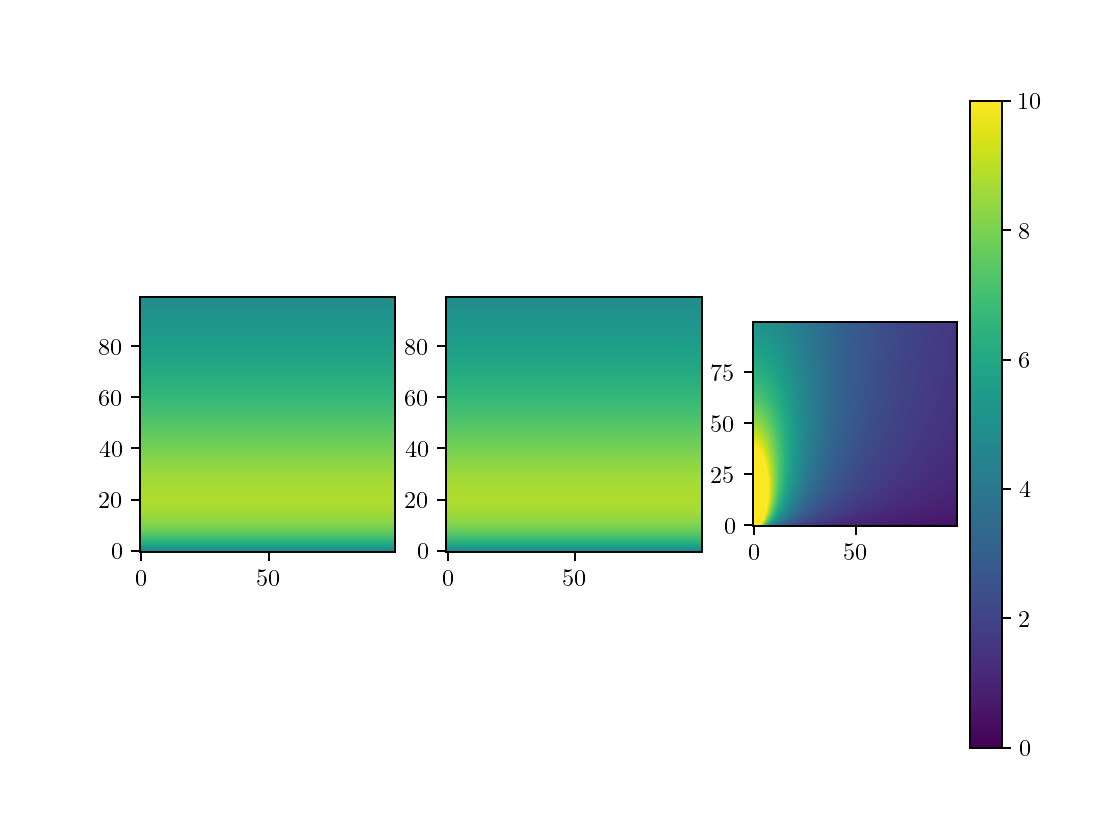

In [44]:
fig, ax = plt.subplots(1,3)
key = "delta"
ax[0].imshow(res[key][0,...],origin="lower",vmin=0,vmax=10)
ax[1].imshow(res[key][1,...],origin="lower",vmin=0,vmax=10)
ax_cb = ax[2].imshow(res[key][2,...],origin="lower",vmin=0,vmax=10)
plt.colorbar(ax_cb)
plt.show()

<IPython.core.display.Javascript object>


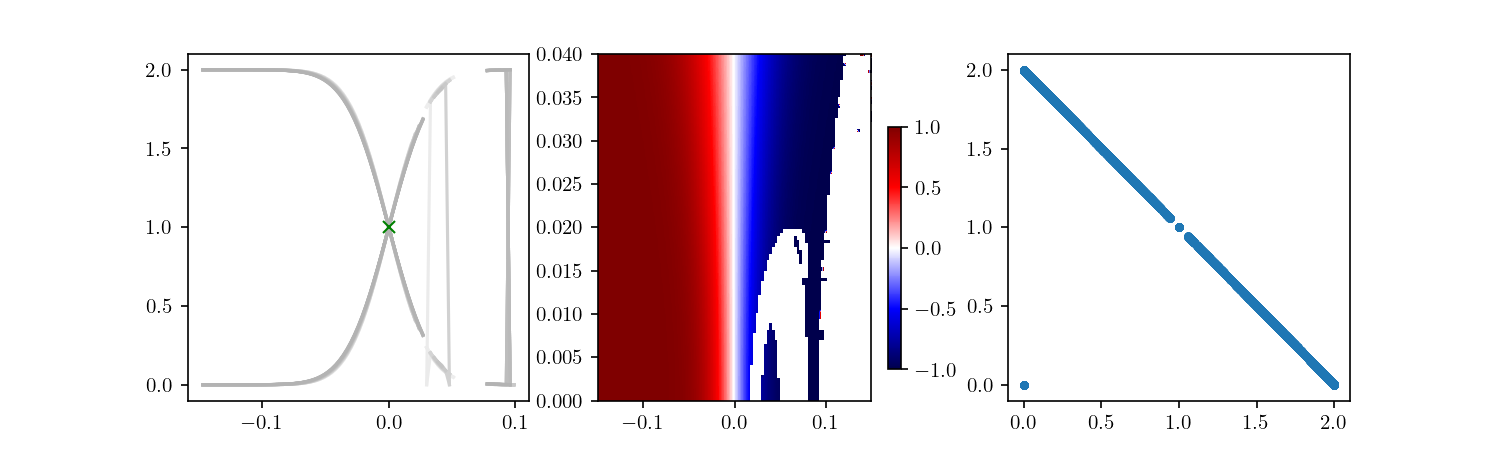

[1.9996293655406028 1.9996291677016176 1.9996288553315775 ...
 5.702922289485593e-14 -- 1.9998703153848458]


In [9]:
p=0
nu_1 = get_nu_bar(res['gamma'][0,...],res['delta'][0,...],res['rate_max'][0,...])
nu_2 = get_nu_bar(res['gamma'][1,...],res['delta'][1,...],res['rate_max'][1,...])
fig,ax = plt.subplots(1,3,figsize=(10,3))
for i in range(0,30):
    col = [1-(i+1)/steps]*3
    ax[0].plot(res['Psi_0'],nu_2[i,:],'-',color=col)
    ax[0].plot(res['Psi_0'],nu_1[i,:],'-',color=col)
    
ax[0].plot(0,1,'gx',markersize=6)
    
#ax[1][0].plot(res['alpha_0'],nu_2,'k-')
h_im1 = ax[1].imshow(
    nu_1-options['rateWnt'],
    origin='lower',aspect='auto',
    vmin=-options['rateWnt'],vmax=options['rateWnt'],cmap='seismic',
    extent=tuple(options['simulation'][order[0]]) + tuple(options['simulation'][order[1]])
)
fig.colorbar(h_im1, ax=ax[1], location='right', anchor=(0, 0.3), shrink=0.7)

#h_im2 = ax[1][1].imshow(nu_2-5,origin='lower',vmin=-5,vmax=5,cmap='seismic')
#fig.colorbar(h_im2, ax=ax[1][1], location='right', anchor=(0, 0.3), shrink=0.7)
print(nu_1.flatten())
ax[2].scatter(nu_1.flatten(),nu_2.flatten(),marker='.')
plt.show()